# Manómetro em U (diferencial)

Queremos o diferencial de pressão entre A e B $(\Delta p = p_A − p_B)$ num manómetro em $U$ com fluido na conduta e fluido manométrico.

## Sabemos que

$
P_{P_{2}}=P_{P_{1}}+\rho_{fluido}\times g \times h = P_{P_{1}}+\gamma_{fluido} \times h
$

Significa isto que, simplificadamente, numa coluna de fluido a Pressão $P_{P_{2}}$ num ponto ($P_{2}$) é igual à Pressão $P_{P_{1}}$ em ($P_{1}$), situado verticalmente abaixo do Ponto $P_{2}$, acrescido ($+$) do peso da coluna de fluido ($\gamma_{fluido} \times h$) entre os dois pontos.

Podemos simplificar o problema para a seguinte esquematização:


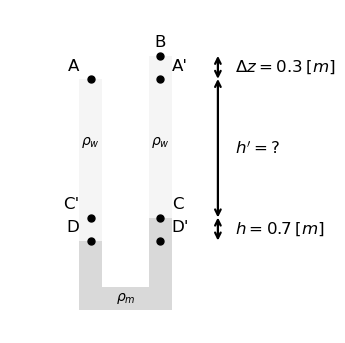

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# --- parâmetros simples (ajusta só isto) ---
W, H = 10, 14
w = 1         # largura coluna
gap = 2        # vão
y0 = 2        # fundo das colunas
d=1

yD = y0 + 2    # nível D (esq) = topo do escuro à esquerda
yC = y0 + 3    # nível C (dir) = topo do escuro à direita

col_h = 10     # altura total das colunas acima de y0
base_h = 1     # espessura da base inferior (para baixo)

col_fill  = "#F5F5F5"
dark_fill = "#D9D9D9"

# --- posições x (centrado e simétrico) ---
xL = (W - (2*w + gap)) / 2
xR = xL + w + gap

fig, ax = plt.subplots(figsize=(3.0, 4.2))
ax.set_aspect("equal")
ax.set_xlim(0, W)
ax.set_ylim(0, H)
ax.axis("off")

# 1) Retângulo A–D (coluna clara esquerda)
ax.add_patch(Rectangle((xL, y0), w, col_h-d, facecolor=col_fill, edgecolor="none"))

# 2) Retângulo D–fundo (enchimento escuro esquerda)
ax.add_patch(Rectangle((xL, y0), w, yD - y0, facecolor=dark_fill, edgecolor="none"))

# 3) Retângulo a ligar as duas colunas (base inferior)
ax.add_patch(Rectangle((xL, y0 - base_h), (xR + w) - xL, base_h,
                       facecolor=dark_fill, edgecolor="none"))

# 4) Retângulo B–C (coluna clara direita)
ax.add_patch(Rectangle((xR, y0), w, col_h, facecolor=col_fill, edgecolor="none"))

# 5) Retângulo C–fundo (enchimento escuro direita)
ax.add_patch(Rectangle((xR, y0), w, yC - y0, facecolor=dark_fill, edgecolor="none"))

A  = (xL + 0.5, y0 + col_h-d)
B  = (xR + 0.5, y0 + col_h)
Ap = (xR + w - 0.5, y0 + col_h-d)

Cp = (xL + 0.5, yC)
D  = (xL + 0.5, yD)

C  = (xR + 0.5, yC)
Dp = (xR + 0.5, yD)

rhow= (xL + 0.5, (y0 + col_h-d)*0.5)
rhom= ((xL+xR)*0.5, 0)

ax.text(xL + 0.5,(y0 + col_h-d)*0.75, r"$\rho_w$", ha="center", va="center")
ax.text(xR + 0.5,(y0 + col_h-d)*0.75, r"$\rho_w$", ha="center", va="center")
ax.text((xL+xR)*0.5+0.5,1+0.5, r"$\rho_m$", ha="center", va="center")

dot_kw = dict(marker="o", color="black", ms=5, linestyle="None")

pts = [
    ("A",  A,  "leftcol"),
    ("B",  B,  "top"),
    ("A'", Ap, "rightcol"),
    ("C'", Cp, "leftcol"),
    ("D",  D,  "leftcol"),
    ("C",  C,  "rightcol"),
    ("D'", Dp, "rightcol"),
]
for lab, (x, y), side in pts:
    ax.plot(x, y, **dot_kw)

    if side == "leftcol":
        ax.text(x-0.5, y+0.25, lab, ha="right", va="bottom", fontsize=12)
    elif side == "rightcol":
        ax.text(x+0.5, y+0.25, lab, ha="left", va="bottom", fontsize=12)
    else:  # "top"
        ax.text(x, y+0.25, lab, ha="center", va="bottom", fontsize=12)
        
arrow_kw = dict(arrowstyle="<->", lw=1.6, color="black", shrinkA=0, shrinkB=0)

# seta 2 (por exemplo na coluna direita)
x = xR + w + 2
y1, y2 = yD, yC
ax.annotate("", xy=(x, y2), xytext=(x, y1), arrowprops=arrow_kw)
ym = 0.5*(y1 + y2)
ax.text(x + 0.75, ym, r"$h=0.7\:[m]$", rotation=0,
        ha="left", va="center", fontsize=12)

# seta 2 (por exemplo na coluna direita)
x = xR + w + 2
y1, y2 = yC, y0 + col_h-d
ax.annotate("", xy=(x, y2), xytext=(x, y1), arrowprops=arrow_kw)
ym = 0.5*(y1 + y2)
ax.text(x + 0.75, ym, r"$h'=?$", rotation=0,
        ha="left", va="center", fontsize=12)

# seta 2 (por exemplo na coluna direita)
x = xR + w + 2
y1, y2 = y0 + col_h-d, y0 + col_h
ax.annotate("", xy=(x, y2), xytext=(x, y1), arrowprops=arrow_kw)
ym = 0.5*(y1 + y2)
ax.text(x + 0.75, ym, r"$\Delta z = 0.3\:[m]$", rotation=0,
        ha="left", va="center", fontsize=12)


plt.show()


Também sabemos que num fluido à mesma cota, desde que conectado sempre no mesmo fluido, a pressão é igual. Assim:

$P_{D}=P_{D'}$

Necessitamos de obter a Pressão em $D$ e $D'$. Assim:

$P_{D}=P_{A}+h\times\gamma_w+h'\times\gamma_w$

e

$P_{D'}=P_{B}+\Delta z\times\gamma_w + h'\times\gamma_w+ h\times \gamma_m$

Que corresondem ao somatório das colunas de fluido acima dos respectivos pontos. Igualando:

$P_{A}+h\times\gamma_w+h'\times\gamma_w=P_{B}+\Delta z\times\gamma_w + h'\times\gamma_w+ h\times \gamma_m <=>$

$P_{A}-P_{B}=\Delta z\times\gamma_w + h'\times\gamma_w+ h\times \gamma_m - h\times\gamma_w -h'\times\gamma_w <=>$

$\Delta P =\Delta z\times\gamma_w + h\times \gamma_m - h\times\gamma_w <=>$

$\Delta P =\Delta z\times\gamma_w + h\times (\gamma_m - \gamma_w)$

Nota: A fórmula informa que a diferença de pressão é proporcional à diferença de alturas da tomada $\Delta z$, à medição manométrica $h$ e à diferença de peso volumico/massa volumica/densidade dos fluidos usados ($\gamma_m e \gamma_w$).

Substituindo os valores:

$\Delta P =0.3\:[m]\times 1000 \:[kg\:m^{-2}\:s^{-2}] + 0.7\:[m] \times (133416 \:[kg\:m^{-2}\:s^{-2}] - 1000 \:[kg\:m^{-2}\:s^{-2}])$

$\Delta P =89467.2\:[Pa]\:ou \:[kg\:m\:s^{-2}]\approx 8950\:[\:kgf\:m{⁻2}])$


In [2]:
%matplotlib inline

import math
import numpy as np
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Output
from IPython.display import display, Markdown, clear_output
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def delta_p(padrao='pA-pB', rho_f=1000.0, rho_m=13600.0, g=9.81, h=0.7, dz=0.3):
    # dz = zB - zA
    dp = rho_f*g*dz + (rho_m-rho_f)*g*h
    return dp if padrao == 'pA-pB' else -dp

# Sliders (todas as variáveis)
rho_f_w = widgets.FloatSlider(value=1000.0, min=500.0, max=1500.0, step=10.0, description='$ρ_f (kg m^{-3})$', continuous_update=False)
rho_m_w = widgets.FloatSlider(value=13600.0, min=1000.0, max=20000.0, step=50.0, description='$ρ_m (kg m^{-3})$', continuous_update=False)
g_w     = widgets.FloatSlider(value=9.81, min=1.0, max=20.0, step=0.01, description='$g (m s^{-2})$', continuous_update=False)
h_w     = widgets.FloatSlider(value=0.7, min=0.0, max=2.0, step=0.01, description='$h (m)$', continuous_update=False)
dz_w    = widgets.FloatSlider(value=0.3, min=-2.0, max=2.0, step=0.01, description='$z_B-z_A (m)$', continuous_update=False)

conv_w  = widgets.Dropdown(options=[('Δp = pA − pB','pA-pB'), ('Δp = pB − pA','pB-pA')], value='pA-pB', description='Convenção:')

ui = VBox([
    HBox([rho_f_w, rho_m_w]),
    HBox([g_w, h_w, dz_w]),
    HBox([conv_w])
])

out_plot = Output()
out_txt  = Output()
display(VBox([ui, out_plot, out_txt]))

def draw_schematic(h, dz):
    # Desenho 2D simples (esquemático) do U com níveis
    fig, ax = plt.subplots(figsize=(8, 3.2))
    ax.set_aspect('equal')
    ax.axis('off')

    # Geometria esquemática
    xL, xR = 0.0, 3.0
    yB = 0.0
    yL = 1.0
    yR = 1.0 + h

    # Tubo (contorno)
    ax.plot([xL, xL, xR, xR], [2.2, yL, yR, 2.2], color='black', lw=2)
    ax.plot([xL, xR], [yB, yB], color='black', lw=2)
    ax.plot([xL, xL], [yB, 2.2], color='black', lw=2)
    ax.plot([xR, xR], [yB, 2.2], color='black', lw=2)

    # Fluido manométrico (abaixo das interfaces)
    ax.add_patch(patches.Rectangle((xL-0.06, yB), 0.12, yL-yB, color='#888888', alpha=0.6))
    ax.add_patch(patches.Rectangle((xR-0.06, yB), 0.12, yR-yB, color='#888888', alpha=0.6))
    ax.add_patch(patches.Rectangle((xL, yB-0.06), xR-xL, 0.12, color='#888888', alpha=0.6))

    # Interfaces
    ax.plot([xL-0.25, xL+0.25], [yL, yL], color='black', lw=2)
    ax.plot([xR-0.25, xR+0.25], [yR, yR], color='black', lw=2)

    # Seta h
    ax.annotate('', xy=(xR+0.55, yR), xytext=(xR+0.55, yL), arrowprops=dict(arrowstyle='<->', lw=2))
    ax.text(xR+0.65, 0.5*(yL+yR), 'h', va='center', fontsize=12)

    # Indicação dz (zB - zA) como texto
    ax.text(1.15, 2.35, f"zB−zA = {dz:.3g} m", fontsize=12)

    # Rótulos A e B
    ax.text(xL-0.2, 2.25, '$A$', fontsize=12)
    ax.text(xR-0.2, 2.25, '$B$', fontsize=12)

    ax.set_xlim(-0.8, 4.2)
    ax.set_ylim(-0.4, 2.8)
    plt.show()

def update(change=None):
    rho_f = float(rho_f_w.value)
    rho_m = float(rho_m_w.value)
    g     = float(g_w.value)
    h     = float(h_w.value)
    dz    = float(dz_w.value)
    conv  = conv_w.value

    dp = delta_p(padrao=conv, rho_f=rho_f, rho_m=rho_m, g=g, h=h, dz=dz)

    with out_plot:
        clear_output(wait=True)
        draw_schematic(h=h, dz=dz)

    with out_txt:
        clear_output(wait=True)
        display(Markdown(
            f"- $ρ_f$ = {rho_f:.6g} $kg m^{-3}$  \n"
            f"- $ρ_m$ = {rho_m:.6g} $kg m^{-3}$  \n"
            f"- $g$ = {g:.6g} $m s^{-2}$  \n"
            f"- $h$ = {h:.6g} $m$ \n"
            f"- $zB−zA$ = {dz:.6g} $m$  \n"
            f"- $ Δp$ ({'$p_A−p_B$' if conv=='pA-pB' else '$p_B−p_A$'}) = {dp:.6g} $Pa =$ {dp/1000:.6g} $kPa$"
        ))

for w in [rho_f_w, rho_m_w, g_w, h_w, dz_w, conv_w]:
    w.observe(update, names='value')

update()
